In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("dataset/housing.csv")
data.info()

In [ ]:
data.dropna(inplace=True) #Drop empty values and save it to data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(['median_house_value'], axis=1) #We drop targer Value
y = data['median_house_value'] #We use only target Value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) #Split test data and train data (we don't touch test data anymore until the end)

In [ ]:
train_data = X_train.join(y_train) # Combining the training data

In [ ]:
train_data

In [ ]:
train_data.hist(figsize=(10,8))

In [ ]:
train_data_without_ocean_proximity = data.drop(['ocean_proximity'],axis=1)
plt.figure(figsize=(10,8))
sns.heatmap(train_data_without_ocean_proximity.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

In [ ]:
train_data.hist(figsize=(10,7))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

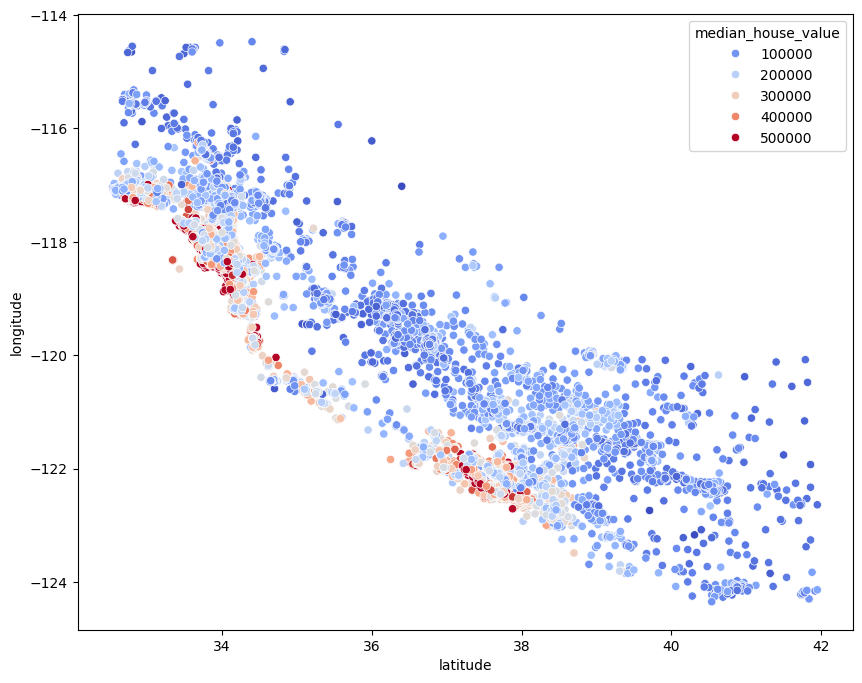

In [84]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [86]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

<Axes: >

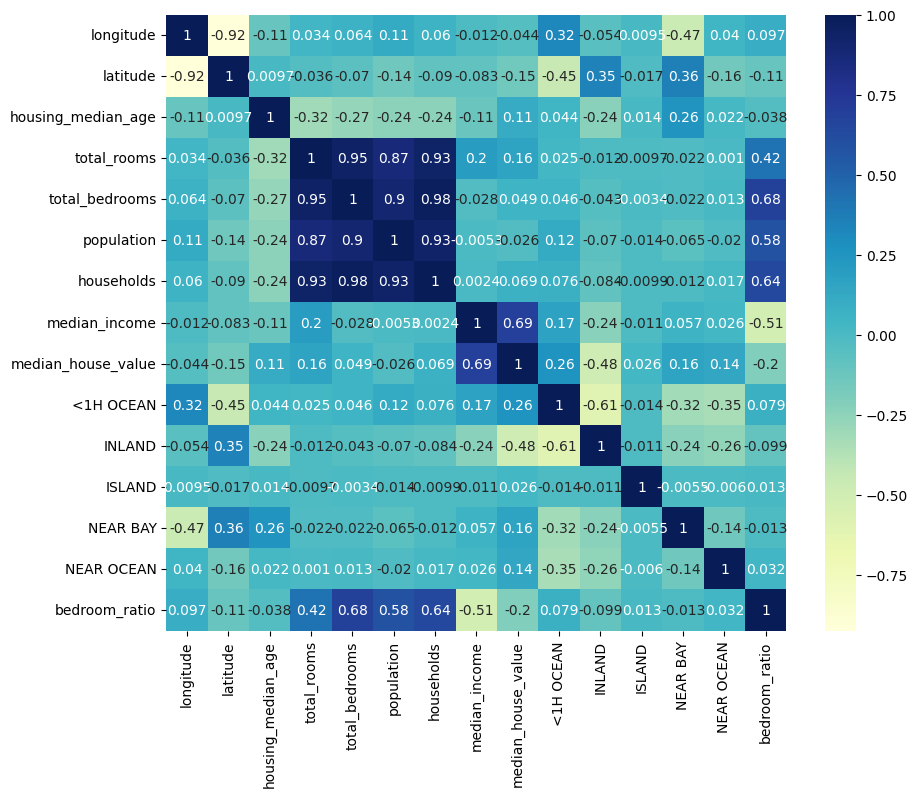

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

#This is Linear Regression Model

In [89]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [98]:
test_data = X_test.join(y_test) # Combining the training data

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [99]:
reg.score(X_test,y_test)

0.660769768643284

#This is Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [103]:
forest.score(X_test,y_test)

0.8154788519571501

In [110]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 200, 300],
    "min_samples_split" : [2,4],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                            scoring="neg_mean_squared_error",
                            return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)